# Filght Price prediction (EDA+ Feature Engineering)

In [160]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
train_df=pd.read_excel("/Users/rohitpatel/Desktop/Data Science/flight price /Data_Train.xlsx")
test_df=pd.read_excel("/Users/rohitpatel/Desktop/Data Science/flight price /Test_set.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [162]:
train_df.shape,test_df.shape

((10683, 11), (2671, 10))

In [163]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [164]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [165]:
# find the missing values
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [166]:
train_df[train_df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [167]:
train_df[train_df['Duration']=='23h 40m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
603,Jet Airways,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,07:40 16 Mar,23h 40m,1 stop,In-flight meal not included,9134
1336,Air India,9/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 10 Mar,23h 40m,2 stops,No info,10660
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
1679,Air India,3/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 04 Jun,23h 40m,2 stops,No info,10975
1837,Air India,09/03/2019,Banglore,New Delhi,BLR → GOI → DEL,17:00,16:40 13 Mar,23h 40m,1 stop,No info,9292
1862,Air India,27/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Jun,23h 40m,2 stops,No info,10975
2179,Jet Airways,21/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,18:50 22 Mar,23h 40m,2 stops,No info,9483
2343,Air India,15/05/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 16 May,23h 40m,2 stops,No info,10975
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
2776,Jet Airways,21/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,18:50 22 Mar,23h 40m,2 stops,No info,10929


In [168]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [169]:
# fill the missing values in train dataset
train_df['Total_Stops']=train_df['Total_Stops'].fillna('2 stops')
train_df['Route']=train_df['Route'].fillna('DEL → HYD → MAA → COK')

In [170]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [171]:
# create a list of categorical columns
cate_col=['Airline','Source','Destination','Additional_Info']


In [172]:
# checking the unique values in each categorical column
for i in cate_col:
    print(i,train_df[i].unique ())
    print("__________________________________________________________________")

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
__________________________________________________________________
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
__________________________________________________________________
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
__________________________________________________________________
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
__________________________________________________________________


In [173]:
# now split the date column to extract date,month and year and store them into new columns
train_df['Date']=train_df['Date_of_Journey'].str.split('/').str[0]
train_df['Month']=train_df['Date_of_Journey'].str.split('/').str[1]
train_df['Year']=train_df['Date_of_Journey'].str.split('/').str[2]



In [174]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [175]:
# now drop the Date_of_Journey column
train_df.drop('Date_of_Journey',axis=1,inplace=True)

In [176]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [177]:
# now check for the Total_stops
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [178]:
# label encode the Total_stops column

train_df['Total_Stops']= train_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

## Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route. We split the data in route column, and store all the city names in separate columns

In [179]:
train_df['city1']=train_df['Route'].str.split('→').str[0]
train_df['city2']=train_df['Route'].str.split('→').str[1]
train_df['city3']=train_df['Route'].str.split('→').str[2]
train_df['city4']=train_df['Route'].str.split('→').str[3]
train_df['city5']=train_df['Route'].str.split('→').str[4]
train_df['city6']=train_df['Route'].str.split('→').str[5]


In [180]:
# treat the Dept_time
train_df['Dep_Time_hour']=train_df['Dep_Time'].str.split(':').str[0]
train_df['Dep_Time_min']=train_df['Dep_Time'].str.split(':').str[1]

In [181]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Month,Year,city1,city2,city3,city4,city5,city6,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,...,03,2019,BLR,DEL,NaN,NaN,NaN,NaN,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,...,05,2019,CCU,IXR,BBI,BLR,NaN,NaN,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,...,06,2019,DEL,LKO,BOM,COK,NaN,NaN,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,...,05,2019,CCU,NAG,BLR,NaN,NaN,NaN,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,...,03,2019,BLR,NAG,DEL,NaN,NaN,NaN,16,50


In [182]:
train_df['Arrival_Time']=train_df['Arrival_Time'].apply(lambda x:x.split(" ")[0])

In [183]:
# similarly treat the Arrival_Time

train_df['Arrival_Time_hour']=train_df['Arrival_Time'].str.split(":").str[0]
train_df['Arrival_Time_min']=train_df['Arrival_Time'].str.split(":").str[1]

In [184]:
# now convert the Duration to hour and minutes
train_df['Duration_hours']=train_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

train_df['Duration_min']=train_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [185]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,city3,city4,city5,city6,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,...,NaN,NaN,NaN,NaN,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,...,BBI,BLR,NaN,NaN,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,...,BOM,COK,NaN,NaN,09,25,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,...,BLR,NaN,NaN,NaN,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,...,DEL,NaN,NaN,NaN,16,50,21,35,4,45


In [186]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [187]:
# since I in 'No Info' is capital, we will replace it 
train_df.Additional_Info.replace('No info','No Info',inplace=True)

In [188]:
train_df.isnull().sum()

Airline                  0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              0
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
city1                    0
city2                    0
city3                 3491
city4                 9116
city5                10637
city6                10682
Dep_Time_hour            0
Dep_Time_min             0
Arrival_Time_hour        0
Arrival_Time_min         0
Duration_hours           0
Duration_min          1032
dtype: int64

In [189]:
# since city4,city5 and city 6 has most of null values, we will drop these columns
train_df.drop(['city4','city5','city6'],axis=1,inplace=True)

In [190]:
train_df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Route                   0
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             0
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
city1                   0
city2                   0
city3                3491
Dep_Time_hour           0
Dep_Time_min            0
Arrival_Time_hour       0
Arrival_Time_min        0
Duration_hours          0
Duration_min         1032
dtype: int64

In [191]:
# we replace nan with 'None' in city3
train_df['city3'].fillna('None',inplace=True)

In [192]:
# fill the null values in Duration_min with 0
train_df['Duration_min'].fillna(0,inplace=True)

In [193]:
# drop route, arrival_time, dept_time columns
train_df.drop(['Route','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [194]:
# 

In [195]:
# change the datatype
train_df['Total_Stops']=train_df['Total_Stops'].astype(int)
train_df['Date']=train_df['Date'].astype(int)
train_df['Month']=train_df['Month'].astype(int)
train_df['Year']=train_df['Year'].astype(int)
train_df['Dep_Time_hour']=train_df['Dep_Time_hour'].astype(int)
train_df['Dep_Time_min']=train_df['Dep_Time_min'].astype(int)
train_df['Arrival_Time_hour']=train_df['Arrival_Time_hour'].astype(int)
train_df['Arrival_Time_min']=train_df['Arrival_Time_min'].astype(int)
#train_df['Duration_hours']=train_df['Duration_hours'].astype(int)
train_df['Duration_min']=train_df['Duration_min'].astype(int)

In [196]:
# During this step we saw that Duration_hours has value '5m'
train_df[train_df['Duration']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,city1,city2,city3,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,No Info,17327,6,3,2019,BOM,GOI,PNQ,16,50,16,55,5m,0


In [197]:
# as we can see here, mumbai to Hyderabad duration time is 5 min which is not possible
# we drop this row
train_df.drop(index=6474,axis=0,inplace=True)

In [198]:
# now convert Duration_hour to int datatype
train_df['Duration_hours']=train_df['Duration_hours'].astype(int)

In [199]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Duration           10682 non-null  object
 4   Total_Stops        10682 non-null  int64 
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   Date               10682 non-null  int64 
 8   Month              10682 non-null  int64 
 9   Year               10682 non-null  int64 
 10  city1              10682 non-null  object
 11  city2              10682 non-null  object
 12  city3              10682 non-null  object
 13  Dep_Time_hour      10682 non-null  int64 
 14  Dep_Time_min       10682 non-null  int64 
 15  Arrival_Time_hour  10682 non-null  int64 
 16  Arrival_Time_min   10682 non-null  int64

In [200]:
train_df.shape

(10682, 19)

# We create separate lists of categorical columns and numerical columns for plotting and analyzing the data :-


In [201]:
cate_col=['Airline','Source','Destination','Additional_Info','city1','city2','city3']
num_col=['Total_Stops','Date','Month','Year','Dep_Time_hour','Dep_Time_min','Arrival_Time_hour','Arrival_Time_min','Duration_hours','Duration_min']

/Users/rohitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rohitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rohitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

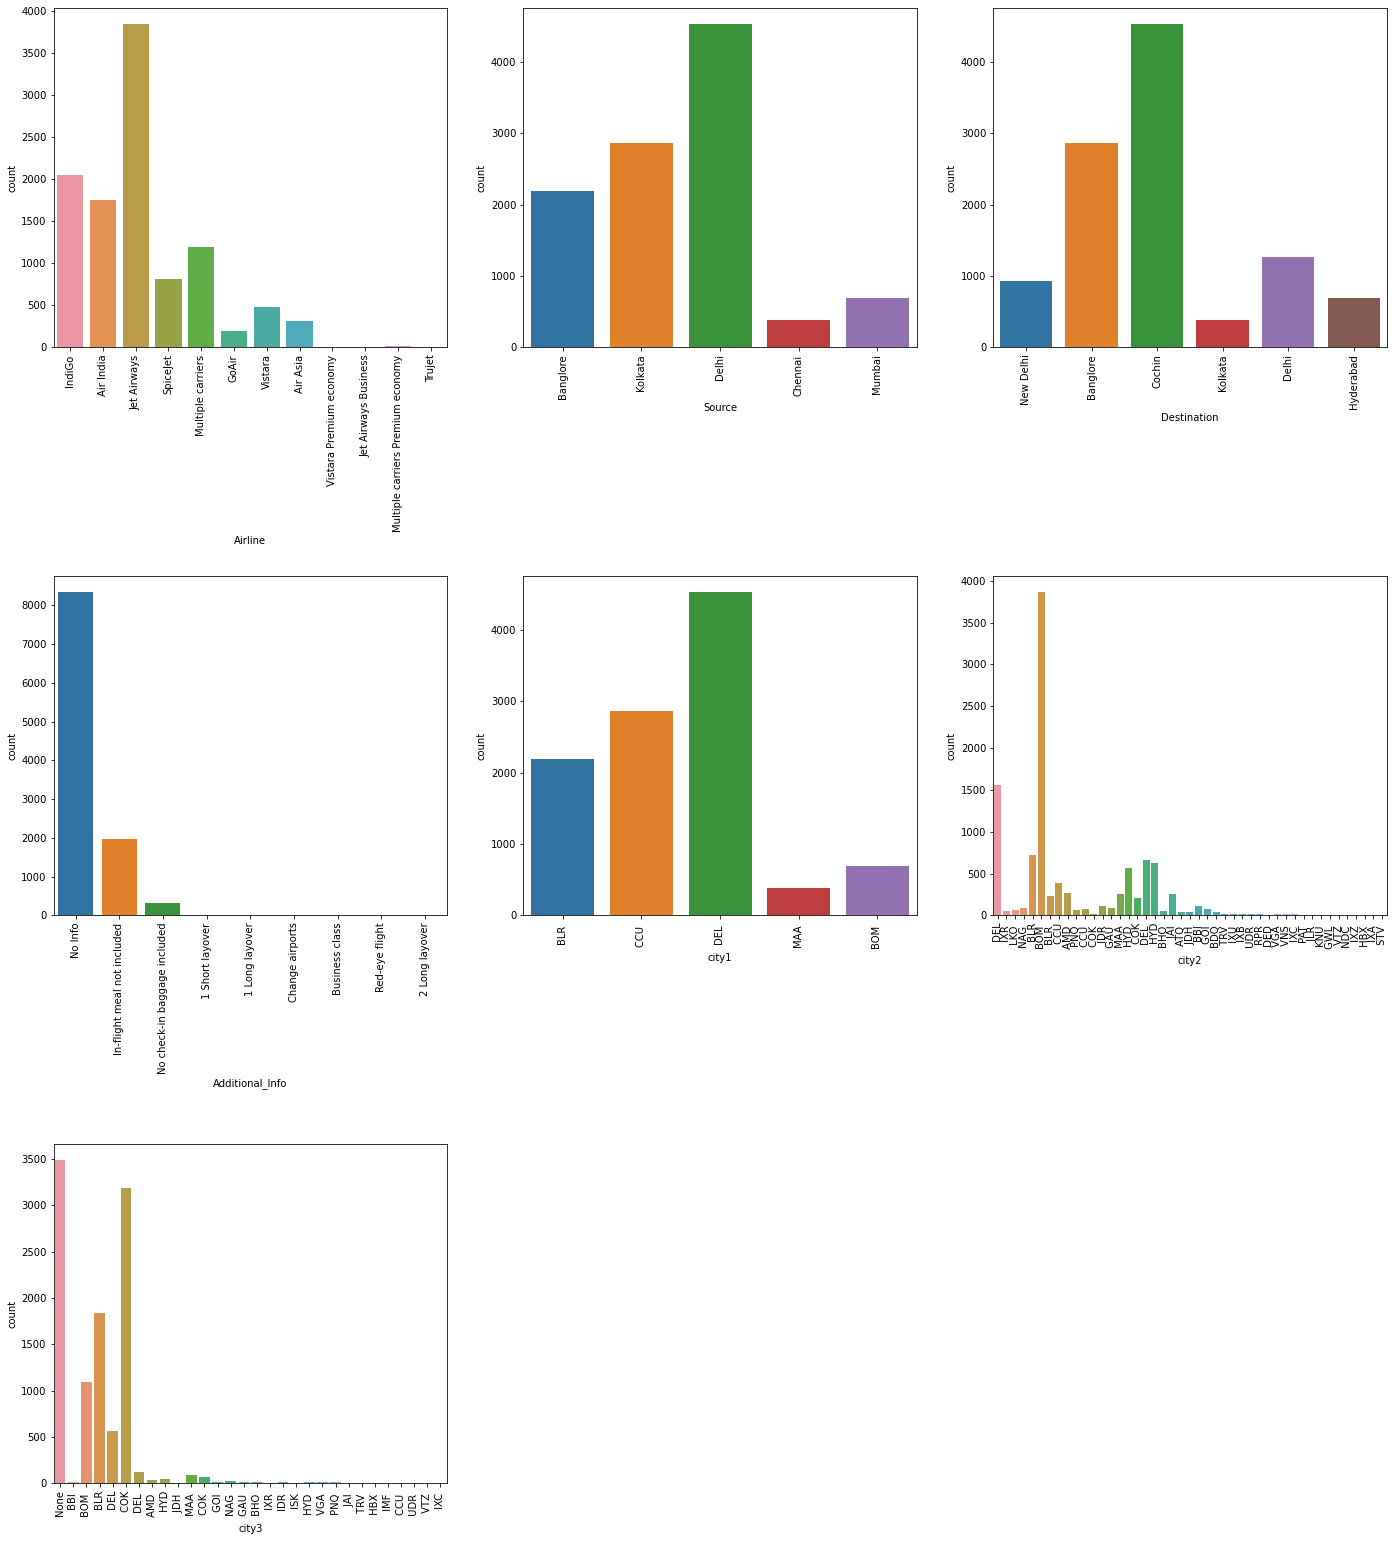

In [202]:
# plot countplots for categorical columns

c=1
plt.figure(figsize=(20,45))
for i in cate_col:
    plt.subplot(6,3,c)
    sns.countplot(train_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1

# Observation:-
1. Jet Airways is the most Preferred flight
2. Most number of flights take off from Delhi and least from chennai
3. Maximum flight lands in cochin and min in kolkata
4. City1 and source has the same data
5. Most flights take a stop in Mumai
6. Majority of flight has no stops


/Users/rohitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rohitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rohitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

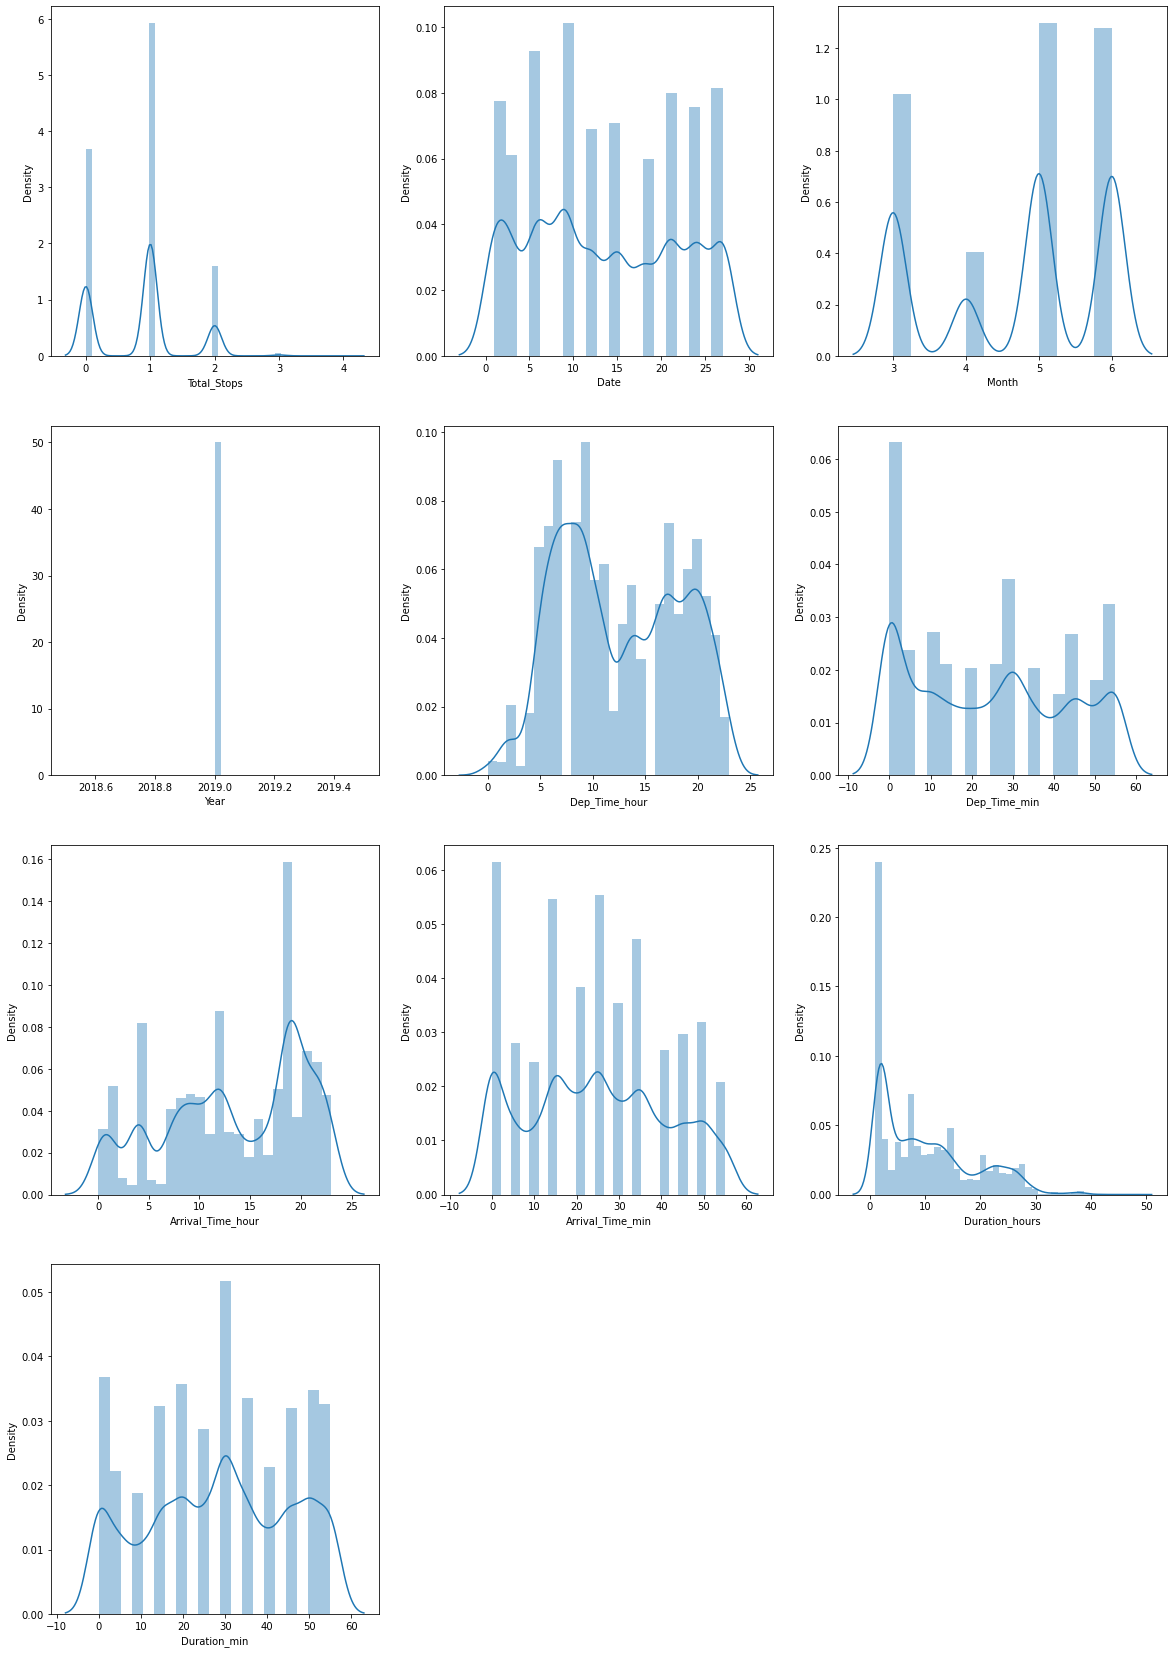

In [203]:
# Distriution plot of numerial data
c=1
plt.figure(figsize=(20,45))

for i in num_col:
    plt.subplot(6, 3, c)
    plt.xlabel(i)
    sns.distplot(train_df[i])
    c = c + 1

# Oservation:-
1. Flight with 3 and 4 stops are very low
2. Less flight in April month
3. Year is 2019 only, so we can  drop this column
4. Majority of flight have duration time between 2-3 hours


/Users/rohitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

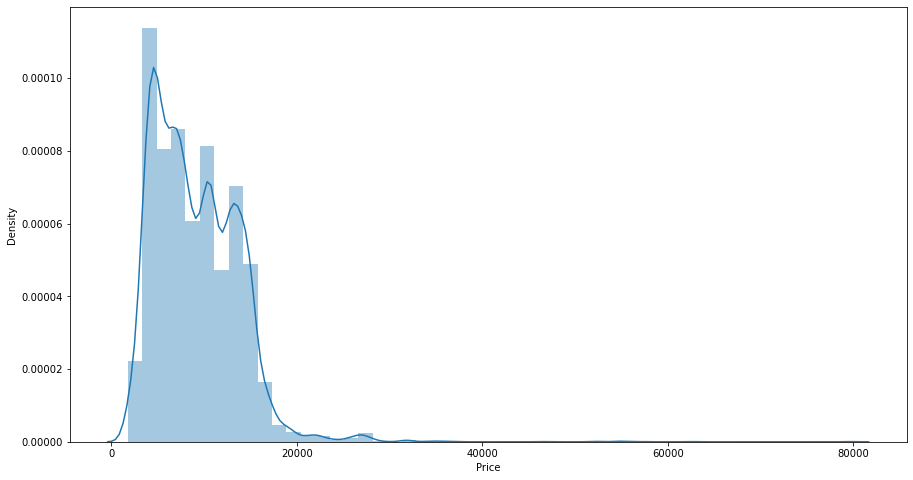

In [204]:
# distriution of price
plt.figure(figsize=(15,8))
sns.distplot(train_df['Price'])

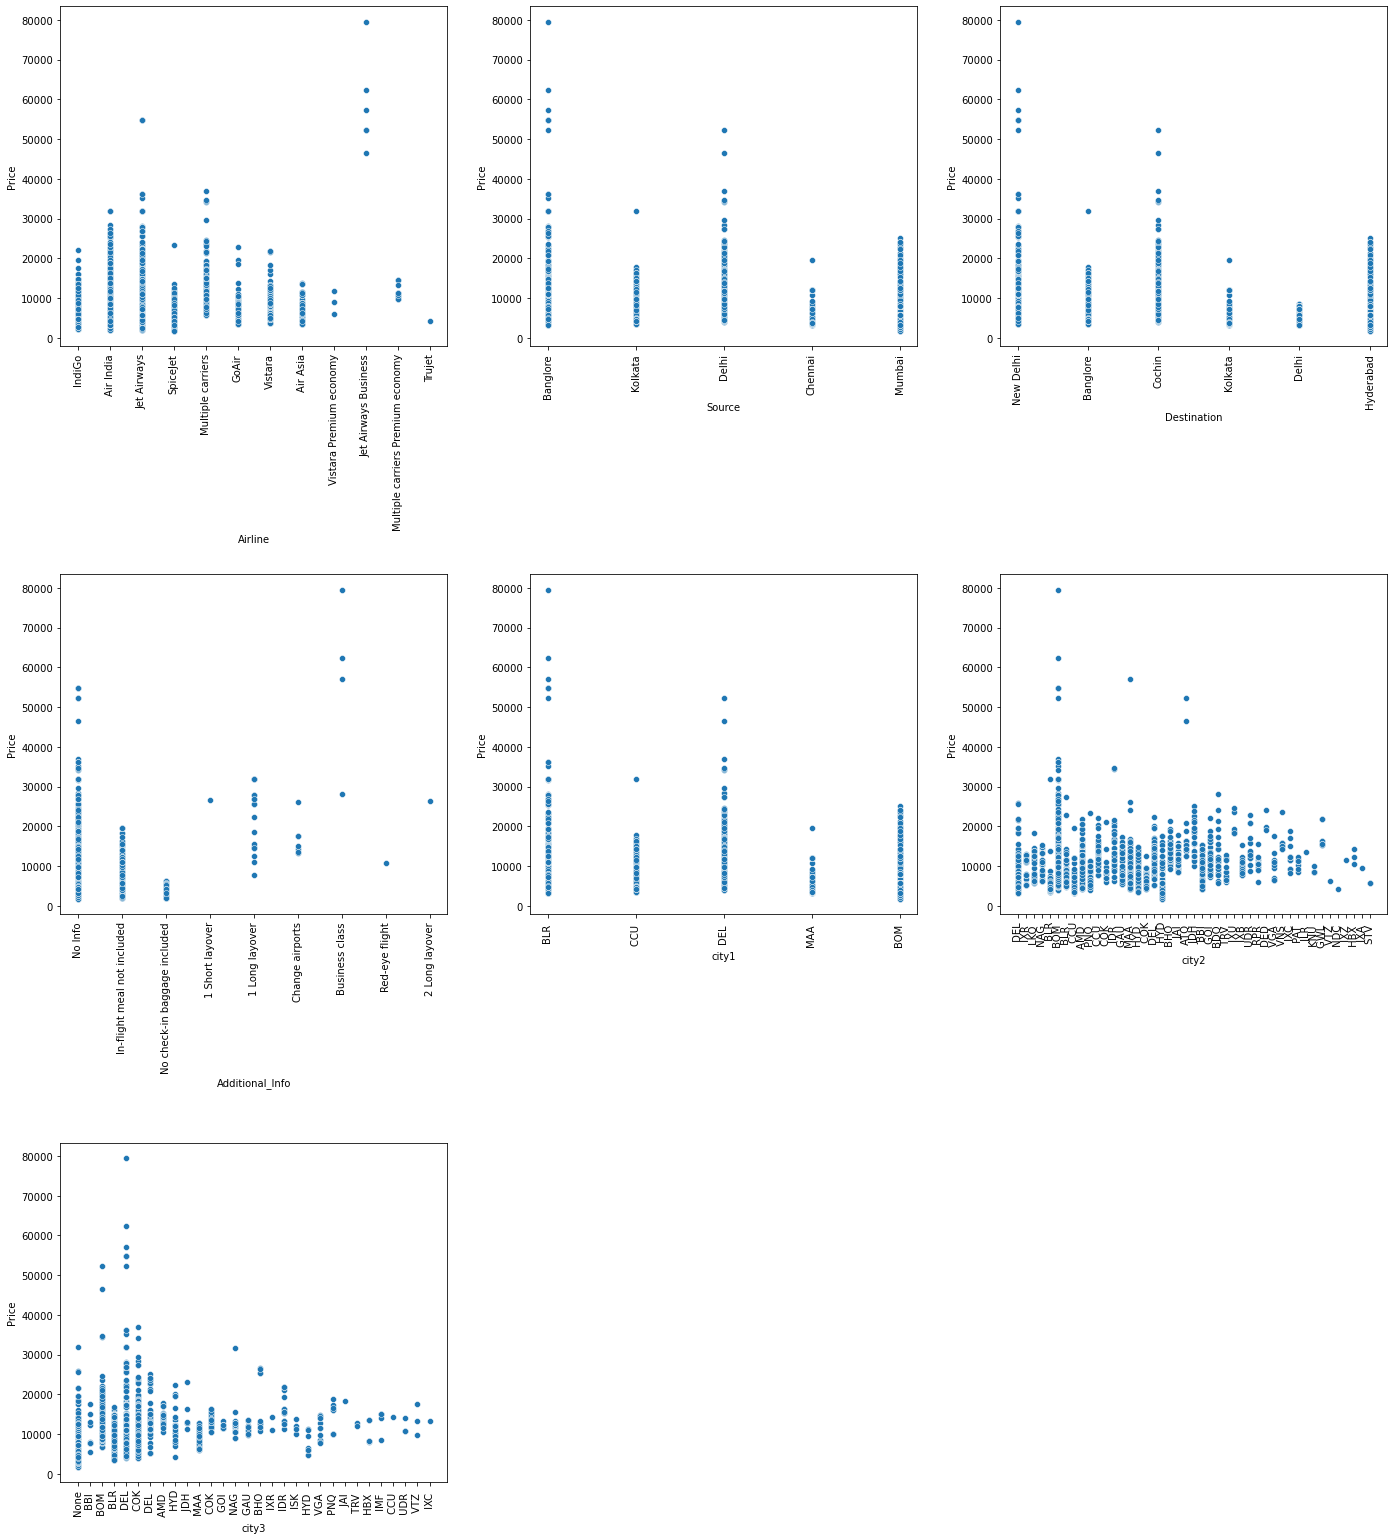

In [205]:
# Checking the relation between price and categorial features 
c=1
plt.figure(figsize=(20,45))
for i in cate_col:
    plt.subplot(6,3,c)
    sns.scatterplot(x=train_df[i],y=train_df['Price'])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1

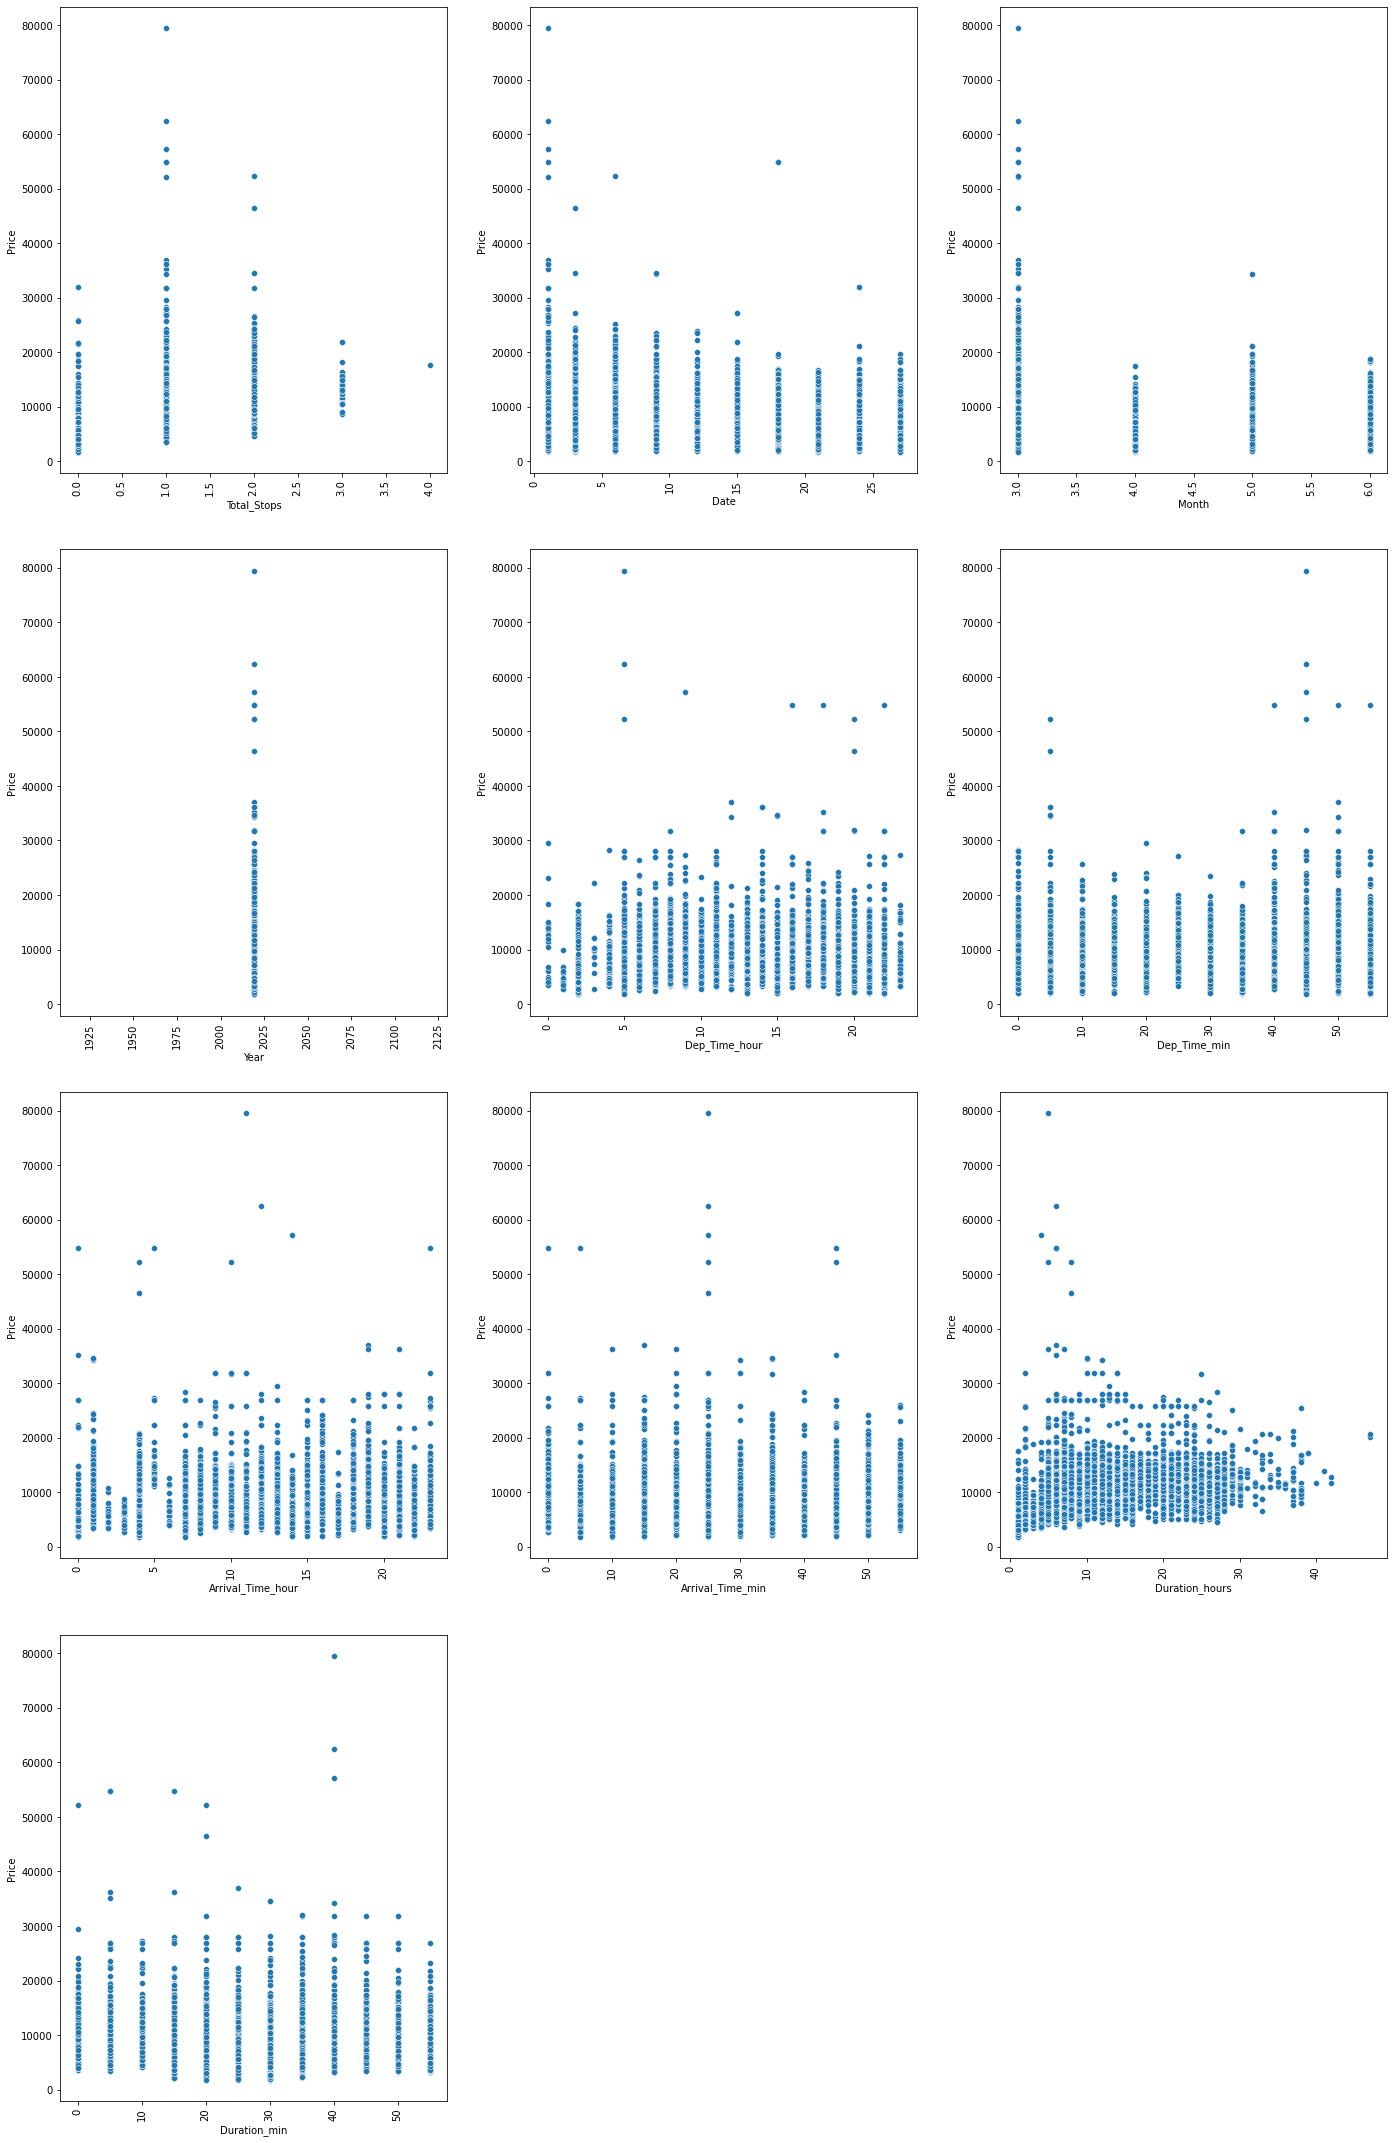

In [206]:
# Checking the relation between price and Numerical features 
c=1
plt.figure(figsize=(20,45))
for i in num_col:
    plt.subplot(6,3,c)
    sns.scatterplot(x=train_df[i],y=train_df['Price'])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1

# Observation:-
After the above analysis, we drop the non-required columns, which we feel have no impact on prices of flights. These columns include ‘Dep_Time_Min’,’Arrival_Time_Min’,’Duration_mins’,’Year’, ‘City1’.

In [207]:
train_df.drop(['Dep_Time_min','Arrival_Time_min','Duration_min','city1'],axis=1,inplace=True)

In [208]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Duration           10682 non-null  object
 4   Total_Stops        10682 non-null  int64 
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   Date               10682 non-null  int64 
 8   Month              10682 non-null  int64 
 9   Year               10682 non-null  int64 
 10  city2              10682 non-null  object
 11  city3              10682 non-null  object
 12  Dep_Time_hour      10682 non-null  int64 
 13  Arrival_Time_hour  10682 non-null  int64 
 14  Duration_hours     10682 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.6+ MB


In [209]:
train_df.skew()

Total_Stops          0.317109
Price                1.813248
Date                 0.118174
Month               -0.387708
Year                 0.000000
Dep_Time_hour        0.113224
Arrival_Time_hour   -0.369876
Duration_hours       0.850822
dtype: float64

# there is some skewness 
We need to treat skewness for ‘Duration_hours’ column, considering a threshold value for skewness as +/-0.5 (we will not transform ‘Price’ column, since it is our target variable).

In [210]:
train_df.Duration_hours=np.log(train_df.Duration_hours)

In [211]:
train_df.Duration_hours.skew()

-0.26612233332369917

In [212]:
train_df.drop('Duration',axis=1,inplace=True)

In [218]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,city2,city3,Dep_Time_hour,Arrival_Time_hour,Duration_hours
0,IndiGo,Banglore,New Delhi,0,No Info,3897,24,3,2019,DEL,None,22,1,0.693147
1,Air India,Kolkata,Banglore,2,No Info,7662,1,5,2019,IXR,BBI,5,13,1.945910
2,Jet Airways,Delhi,Cochin,2,No Info,13882,9,6,2019,LKO,BOM,9,4,2.944439
3,IndiGo,Kolkata,Banglore,1,No Info,6218,12,5,2019,NAG,BLR,18,23,1.609438
4,IndiGo,Banglore,New Delhi,1,No Info,13302,1,3,2019,NAG,DEL,16,21,1.386294


# Encoding the categorical data

In [219]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [220]:
for i in train_df.columns:
    if train_df[i].dtypes=='object':
        print(i)
        train_df[i]=le.fit_transform(train_df[i])

Airline
Source
Destination
Additional_Info
city2
city3


In [221]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,city2,city3,Dep_Time_hour,Arrival_Time_hour,Duration_hours
0,3,0,5,0,6,3897,24,3,2019,13,29,22,1,0.693147
1,1,3,0,2,6,7662,1,5,2019,25,1,5,13,1.945910
2,4,2,1,2,6,13882,9,6,2019,32,4,9,4,2.944439
3,3,3,0,1,6,6218,12,5,2019,34,3,18,23,1.609438
4,3,0,5,1,6,13302,1,3,2019,34,8,16,21,1.386294


In [222]:
# scale the dataframe
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [224]:
y=train_df['Price']

In [225]:
data_x=train_df.drop(['Price'],axis=1)


In [226]:
dataset=sc.fit_transform(data_x)

In [227]:
x=pd.DataFrame(dataset,columns=data_x.columns)

In [228]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,city2,city3,Dep_Time_hour,Arrival_Time_hour,Duration_hours
0,-0.410805,-1.658435,2.416778,-1.220666,0.331448,1.237288,-1.467707,0.0,0.137599,1.395160,1.654268,-1.800319,-1.183304
1,-1.261152,0.890299,-0.973732,1.741432,0.331448,-1.475307,0.250153,0.0,1.636412,-1.082290,-1.303000,-0.050813,0.052178
2,0.014369,0.040721,-0.295630,1.741432,0.331448,-0.531796,1.109082,0.0,2.510719,-0.816849,-0.607172,-1.362943,1.036933
3,-0.410805,0.890299,-0.973732,0.260383,0.331448,-0.177979,0.250153,0.0,2.760521,-0.905329,0.958440,1.407109,-0.279653
4,-0.410805,-1.658435,2.416778,0.260383,0.331448,-1.475307,-1.467707,0.0,2.760521,-0.462927,0.610527,1.115525,-0.499718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,-1.220666,0.331448,-0.531796,-0.608777,0.0,-0.861609,1.395160,1.132397,1.261317,-1.183304
10678,-1.261152,0.890299,-0.973732,-1.220666,0.331448,1.591104,-0.608777,0.0,-0.861609,1.395160,1.306354,1.407109,-1.183304
10679,0.014369,-1.658435,0.382472,-1.220666,0.331448,1.591104,-0.608777,0.0,0.137599,1.395160,-0.781129,-0.342397,-0.783432
10680,2.565411,-1.658435,2.416778,-1.220666,0.331448,-1.475307,-1.467707,0.0,0.137599,1.395160,-0.259258,0.094979,-1.183304


# fitting the regression model



In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [231]:
# create object of each model
lr=LinearRegression()
dt=DecisionTreeRegressor()
kn=KNeighborsRegressor()
svr=SVR()

In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
for i in (lr,dt,kn,svr):
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print("R2 score is:",r2_score(y_test,pred))
        print("R2 for train data:",r2_score(y_train,i.predict(x_train)))
        print("Mean absolute Error is: ",mean_absolute_error(y_test,pred))
        print("Mean Squared Error is: ",mean_squared_error(y_test,pred))
        

LinearRegression()
R2 score is: 0.5174264184915889
R2 for train data: 0.4862458525207006
Mean absolute Error is:  2273.4672357507275
Mean Squared Error is:  9768722.59617537
KNeighborsRegressor()
R2 score is: 0.827014870469403
R2 for train data: 0.8520118935176186
Mean absolute Error is:  1074.379282371295
Mean Squared Error is:  3501732.8100842433
SVR()
R2 score is: 0.06525344702169733
R2 for train data: 0.058278850153021144
Mean absolute Error is:  3340.114502153743
Mean Squared Error is:  18922046.55139628


# Oservation:-
As we can see, KNeighborsRegressor has the highest R2 score


# let's try ensemble method to check whether performance is improving or not


In [233]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [235]:
rfr=RandomForestRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()


In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
for i in (rfr,abr,gbr):
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print("R2 score is:",r2_score(y_test,pred))
        print("R2 for train data:",r2_score(y_train,i.predict(x_train)))
        print("Mean absolute Error is: ",mean_absolute_error(y_test,pred))
        print("Mean Squared Error is: ",mean_squared_error(y_test,pred))
        print("---------------------------------------------------------------------")

RandomForestRegressor()
R2 score is: 0.8771468034899872
R2 for train data: 0.9713547116670579
Mean absolute Error is:  722.5458404121447
Mean Squared Error is:  2525578.3596070292
---------------------------------------------------------------------
AdaBoostRegressor()
R2 score is: 0.17842394525532368
R2 for train data: 0.26061384058415726
Mean absolute Error is:  3458.113576634381
Mean Squared Error is:  16889708.722111765
---------------------------------------------------------------------
GradientBoostingRegressor()
R2 score is: 0.8331244732638989
R2 for train data: 0.8380908091476696
Mean absolute Error is:  1232.481532760811
Mean Squared Error is:  3430575.931643515
---------------------------------------------------------------------


# observation:-
RandomForestRegressor has the highest accuracy

In [240]:
# cross validation to check if model has any overfitting issue or not
from sklearn.model_selection import cross_val_score

In [241]:
for i in range(2,9):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.8496297328426671
RandomForestRegressor() 0.8512157095517475
RandomForestRegressor() 0.8636424282331807
RandomForestRegressor() 0.8734390907121758
RandomForestRegressor() 0.8720057284059618
RandomForestRegressor() 0.870053178822287
RandomForestRegressor() 0.8708149651097252
